Часть 1

In [ ]:
!pip install numpy
!pip install pandas
!pip install joblib
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib

In [24]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os

НАЧНЁМ РАБОТУ С ФАЙЛА TRAIN.CSV.
Для начала посмотрим информацию оп файлу

In [25]:
train = pd.read_csv("train.csv", low_memory=False)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


Начнём удалять аномалии с помощью IQR

In [26]:
import pandas as pd

def remove_outliers_iqr(df, columns=None, threshold=3):
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Автоматически выбрать числовые столбцы
    
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Первый квартиль
        Q3 = df[col].quantile(0.75)  # Третий квартиль
        IQR = Q3 - Q1  # Межквартильный размах
        
        lower_bound = Q1 - threshold * IQR  # Нижняя граница
        upper_bound = Q3 + threshold * IQR  # Верхняя граница
        
        # Фильтрация данных: оставить только значения в допустимых пределах
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Шаг 1: Загрузка данных
train_pas = pd.read_csv("train.csv", low_memory=False)

# Шаг 2: Удаление аномалий из всех числовых столбцов
train_cleaned_no_outliers = remove_outliers_iqr(train_pas)

# Проверка результатов
print("Размер данных до удаления аномалий:", train_pas.shape)
print("Размер данных после удаления аномалий:", train_cleaned_no_outliers.shape)

# Шаг 3: Сохранение обработанных данных
train_cleaned_no_outliers.to_csv("train_save.csv", index=False)
print("Данные без аномалий сохранены в 'train_save.csv'.")


Размер данных до удаления аномалий: (14456, 2666)
Размер данных после удаления аномалий: (0, 2666)
Данные без аномалий сохранены в 'train_save.csv'.


In [27]:
train_pas

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


ПОВТОРИМ ТОЖЕ САМОЕ С ФАЙЛОМ VALID.CSV

In [29]:
import pandas as pd

def remove_outliers_iqr(df, columns=None, threshold=3):
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Автоматически выбрать числовые столбцы
    
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Первый квартиль
        Q3 = df[col].quantile(0.75)  # Третий квартиль
        IQR = Q3 - Q1  # Межквартильный размах
        
        lower_bound = Q1 - threshold * IQR  # Нижняя граница
        upper_bound = Q3 + threshold * IQR  # Верхняя граница
        
        # Фильтрация данных: оставить только значения в допустимых пределах
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Шаг 1: Загрузка данных
valid_pas = pd.read_csv("train.csv", low_memory=False)

# Шаг 2: Удаление аномалий из всех числовых столбцов
valid_cleaned_no_outliers = remove_outliers_iqr(valid_pas)

# Проверка результатов
print("Размер данных до удаления аномалий:", valid_pas.shape)
print("Размер данных после удаления аномалий:", valid_cleaned_no_outliers.shape)

# Шаг 3: Сохранение обработанных данных
valid_cleaned_no_outliers.to_csv("valid_save.csv", index=False)
print("Данные без аномалий сохранены в 'valid_save.csv'.")

Размер данных до удаления аномалий: (14456, 2666)
Размер данных после удаления аномалий: (0, 2666)
Данные без аномалий сохранены в 'valid_save.csv'.


In [30]:
valid_pas

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


ПРИСТУПИМ КО ОЧИСТКИ ПРОПУСКОВ

In [31]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

С помощью матрицы пропусков посмотрим где и сколько пропусков

C:\Users\ALFA\AppData\Local\Temp\ipykernel_13260\3678613044.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450

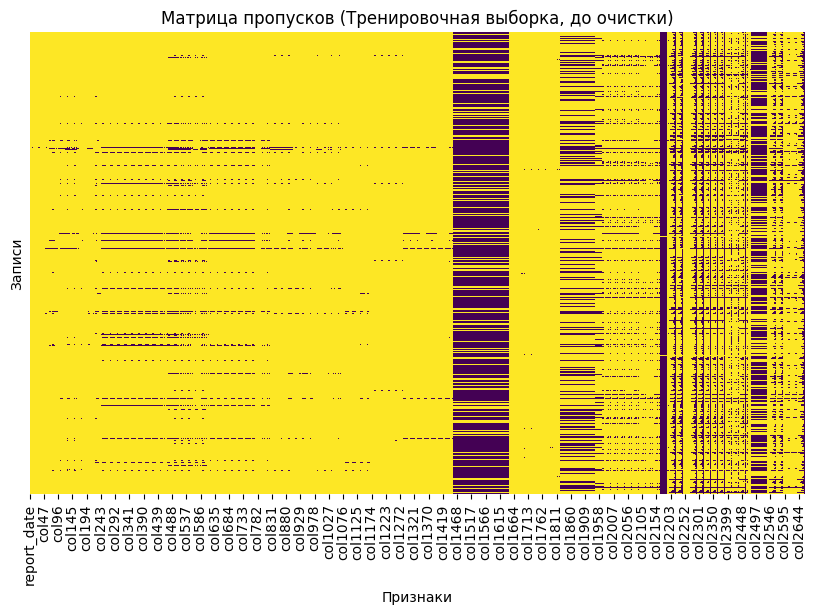

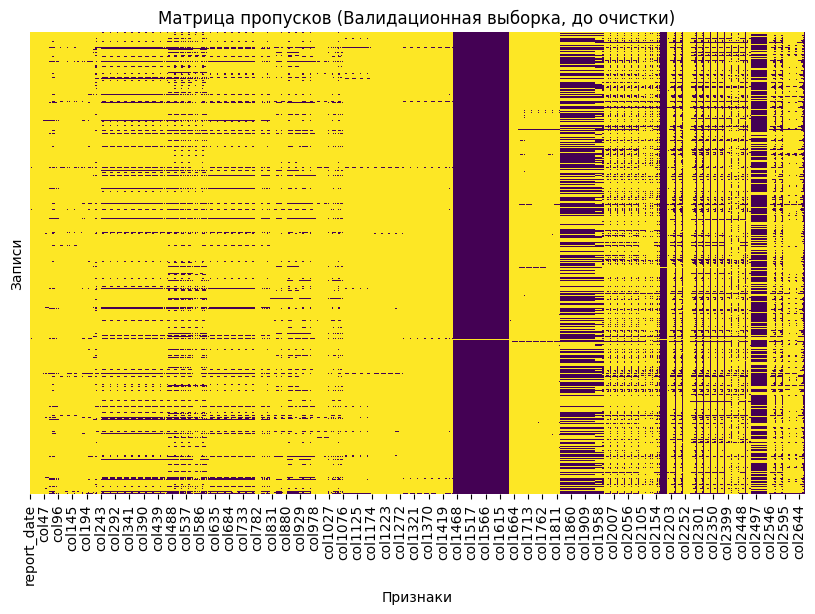

In [32]:
# Загрузка данных
trein_d = pd.read_csv('train.csv')
test_d = pd.read_csv('valid.csv')

# Функция для визуализации пропусков
def plot_missing_matrix(data, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title(title)
    plt.xlabel("Признаки")
    plt.ylabel("Записи")
    plt.show()

# Тренировочная выборка: до и после очисткие
plot_missing_matrix(trein_d, "Матрица пропусков (Тренировочная выборка, до очистки)")

# Валидационная выборка: до и после очистки
plot_missing_matrix(test_d, "Матрица пропусков (Валидационная выборка, до очистки)")

Приступим к очистки

In [33]:
threshold = 0.7

# Рассчитаем долю пропусков для каждого набора данных
train_missing_fraction = train_pas.isnull().mean()
valid_missing_fraction = valid_pas.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между train и valid
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Определяем колонки для удаления, где доля пропусков больше threshold в обоих наборах данных
columns_to_drop = combined_missing_fraction[combined_missing_fraction > threshold].index

# Удаляем колонки с большим количеством пропусков
train_cleaned = train_pas.drop(columns=columns_to_drop)
valid_cleaned = valid_pas.drop(columns=columns_to_drop)

# Проверяем, совпадают ли структуры после удаления колонок с пропусками
if sorted(train_cleaned.columns) != sorted(valid_cleaned.columns):
    raise ValueError("Структуры train и valid не совпадают после удаления колонок с пропусками!")
else:
    print("Структуры train и valid совпадают после удаления колонок с пропусками.")

# Функция для проверки наличия одновременно float и object
def has_mixed_types(column):
    types = set(column.dropna().map(type))  # Собираем все типы в колонке, игнорируя NaN
    return float in types and str in types

# Определяем колонки с разными типами данных
mixed_type_columns_train = [col for col in train_cleaned.columns if has_mixed_types(train_cleaned[col])]
mixed_type_columns_valid = [col for col in valid_cleaned.columns if has_mixed_types(valid_cleaned[col])]

# Удаляем эти колонки из обоих наборов данных
columns_to_drop_mixed = set(mixed_type_columns_train).union(mixed_type_columns_valid)
train_cleaned = train_cleaned.drop(columns=columns_to_drop_mixed)
valid_cleaned = valid_cleaned.drop(columns=columns_to_drop_mixed)

# Проверяем, совпадают ли структуры после дополнительной чистки
if sorted(train_cleaned.columns) != sorted(valid_cleaned.columns):
    raise ValueError("Структуры train и valid не совпадают после удаления колонок с разными типами данных!")
else:
    print("Структуры train и valid теперь совпадают после удаления колонок с разными типами данных.")

# Сохраняем обработанные данные в новые файлы
train_cleaned.to_csv('train_cleaned.csv', index=False)
valid_cleaned.to_csv('valid_cleaned.csv', index=False)

print("Обработанные файлы сохранены как 'train_cleaned.csv' и 'valid_cleaned.csv'.")

Структуры train и valid совпадают после удаления колонок с пропусками.
Структуры train и valid теперь совпадают после удаления колонок с разными типами данных.
Обработанные файлы сохранены как 'train_cleaned.csv' и 'valid_cleaned.csv'.


Заполняем пропуски

In [34]:
# Заполнение пропущенных значений
for col in valid_cleaned.columns:
    if valid_cleaned[col].dtype in ['float64', 'int64']:  # Если колонка числовая
        valid_cleaned[col] = valid_cleaned[col].fillna(valid_cleaned[col].median())
    elif valid_cleaned[col].dtype == 'object':  # Если колонка текстовая
        valid_cleaned[col] = valid_cleaned[col].fillna('unknown')

In [35]:
# Заполнение пропущенных значений
for col in train_cleaned.columns:
    if train_cleaned[col].dtype in ['float64', 'int64']:  # Если колонка числовая
        train_cleaned[col] = train_cleaned[col].fillna(train_cleaned[col].median())
    elif train_cleaned[col].dtype == 'object':  # Если колонка текстовая
        train_cleaned[col] = train_cleaned[col].fillna('unknown')

Построим матрицу для проверки количества пропусков

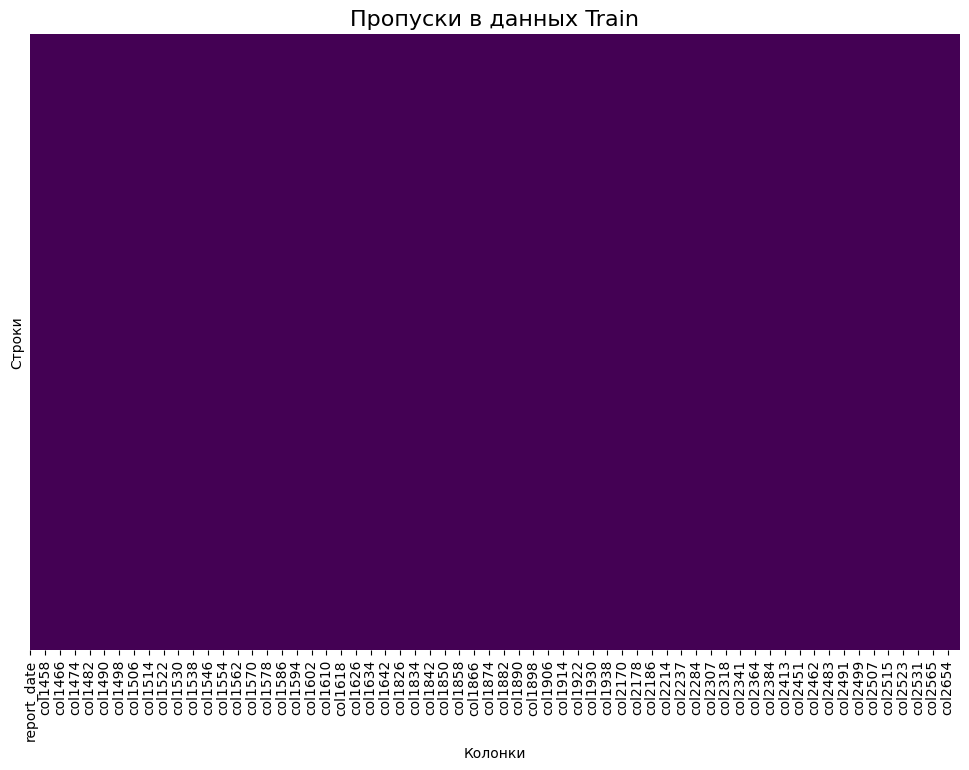

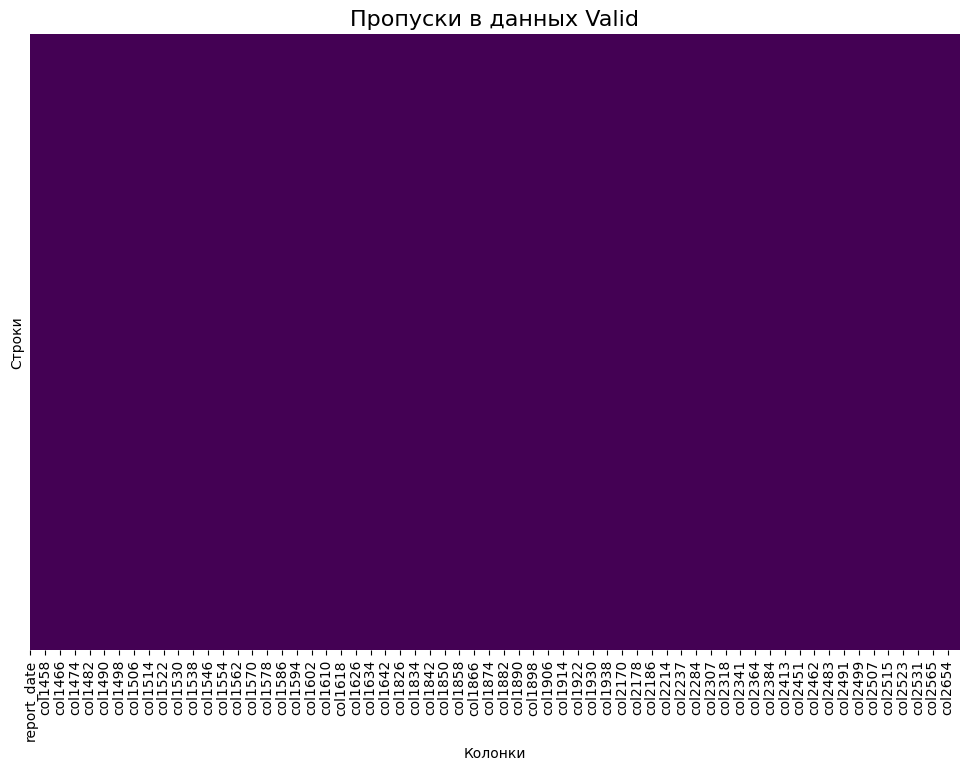

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитаем долю пропусков для каждого набора данных
train_missing_fraction = train_cleaned.isnull().mean()
valid_missing_fraction = valid_cleaned.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между train и valid
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Визуализация пропусков в train
plt.figure(figsize=(12, 8))
sns.heatmap(train_cleaned.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Train", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()

# Визуализация пропусков в valid
plt.figure(figsize=(12, 8))
sns.heatmap(valid_cleaned.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Valid", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()


Закончили работу с файлами train.csv и valid.csv. Сохранённый результат находится в файлах train_cl.csv и valid_cl.csv